## From this notebook, we are going to build classification models.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/sales.csv')
df.dropna(subset=['price'], inplace=True)

In [3]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015]
test_raw = df[df.year >= 2015]

In [14]:
train_raw.head(20)

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,2008
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,1997
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,2001
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,2000
5,$59k,"$60,320",2 Ton 930 Kg,Aug 19 2011,H,super advanced,M14124,"IN732067,IN732068,IN732069,IN732070,IN732071,I...",2.71 meters,96 cm,25 cm,2011
6,NaN,"$182,233",3 Ton 300 Kg,Oct 11 1996,S,super advanced,M14125,"IN732073,IN732074",3.01 meters,96 cm,25 cm,1996
7,NaN,"$41,155",3 Ton 80 Kg,Jan 08 2010,"B,A",advanced,M14126,IN732075,2.97 meters,94 cm,25 cm,2010
8,$66k,"$180,759",3 Ton 330 Kg,Aug 01 2014,H,super advanced,NaN,"IN732076,IN732077,IN732073,IN732078,IN732079,I...",2.71 meters,102 cm,27 cm,2014
9,$119k,"$182,517",2 Ton 970 Kg,Feb 04 2005,"K,D",advanced,M14127,"IN732085,IN732086,IN732087",2.84 meters,94 cm,25 cm,2005
11,$81k,"$228,868",2 Ton 940 Kg,Apr 04 2008,N,advanced,M14129,"IN732093,IN732094,IN732095,IN732096",2.52 meters,99 cm,26 cm,2008


# 1. Generate Targets

<font color='red'>Assignment:</font> We define a categorical target **luxury**. If **price** is higher than 500k dollars, we say this item is a **luxury**, and use integer 1 to mark it as positive. Otherwise, we use 0 to mark it as negative. Get the target Series for training and testing data sets (**y_train** and **y_test**), respectively.

In [52]:
y_train = train_raw['price'].map(lambda x: float(x.strip('$').replace(',',''))).map(lambda x: 1 if x > 500000 else 0)
y_test = test_raw['price'].map(lambda x: float(x.strip('$').replace(',',''))).map(lambda x: 1 if x > 500000 else 0)

In [54]:
y_train.head(20)

0     0
1     0
2     0
4     0
5     0
6     0
7     0
8     0
9     0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    0
19    0
20    0
21    0
Name: price, dtype: int64

<font color='red'>Assignment:</font> Visualize the comparison between the numbers of positive and negative data points. **Hint:** You could use either bar chart or pie chart.

<AxesSubplot:title={'center':'y_train'}, ylabel='price'>

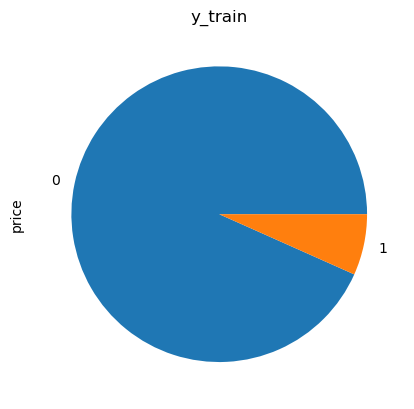

In [55]:
import pandas as pd
%matplotlib inline 

y_train.value_counts().plot(kind='pie',title='y_train')

<AxesSubplot:title={'center':'y_test'}, ylabel='price'>

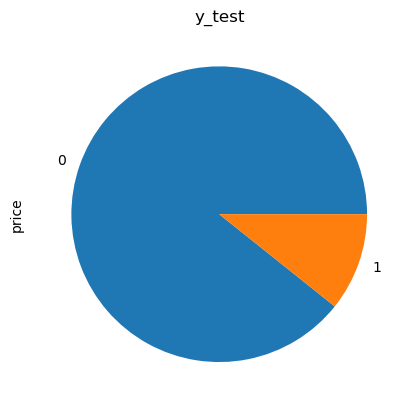

In [56]:
y_test.value_counts().plot(kind='pie',title='y_test')

<font color='red'>Question:</font> What is the definition of base rate?

In [ ]:
# Base rate refers to the prevalence of an event within a given population.

<font color='red'>Question:</font> What is the base rate in this case?

In [57]:
y_train.sum() / y_train.count()

0.06673920928545521

In [58]:
y_test.sum() / y_test.count()

0.10722610722610723

In [ ]:
#The base rate of the train data is 0.067 and that of the test data is 0.107

# 2. Simplest Models

## 2.1 All Negative Model

### 2.1.1 Model Building

<font color='red'>Assignment:</font> Build a model which always predicts 0.

In [59]:
class all_negative(object):
    
    def fit(self, X_train):
        pass
        
    def predict(self, X_train):
        length = len(X_train)
        return pd.Series([0]*length)

<font color='red'>Assignment:</font> Make predictions for both training and testing data.

In [60]:
anm = all_negative()

anm.fit(train_raw)
y_train_pred = anm.predict(train_raw)
y_test_pred = anm.predict(test_raw)

### 2.1.2 Accuracy

<font color='red'>Assignment:</font> Calculate the training and testing **accuracy_score**s.

In [61]:
train_accuracy = sum(y_train_pred.values == y_train.values) / len(y_train)
test_accuracy = sum(y_test_pred.values == y_test.values) / len(y_test)

print('train accuracy: {0:.2e}'.format(train_accuracy))
print('test accuracy: {0:.2e}'.format(test_accuracy))

train accuracy: 9.33e-01
test accuracy: 8.93e-01


<font color='red'>Question:</font> How is accuracy score calculated?

In [ ]:
# Accuracy score is calculated as the counts of correct predicted event devided by total counts of all events.

<font color='red'>Question:</font> Are the accuracy scores good? Why is that? Is the model useful?

In [ ]:
# The accuracy scores look good but they are misleding. The socre is good because the base rate is low.
# However, the model does not provide any useful insight of how the positive events are related to the indepedent variables.

<font color='red'>Question:</font> How is accuracy score related to base rate?

In [ ]:
# In binary classification, accuracy score might be biased (extremly high or low) if the base rate is deviated from 0.5.

### 2.1.2 Precision

<font color='red'>Assignment:</font> Calculate the training and testing **precision_score**s.

In [ ]:
# The result is 0/0 for a all negative model.

In [64]:
train_cnt_tp = sum((y_train_pred.values == 1) & (y_train.values == 1))
train_cnt_fp = sum((y_train_pred.values == 1) & (y_train.values == 0))
train_cnt_tn = sum((y_train_pred.values == 0) & (y_train.values == 0))
train_cnt_fn = sum((y_train_pred.values == 0) & (y_train.values == 1))

In [65]:
print(train_cnt_tp)
print(train_cnt_fp)
print(train_cnt_tn)
print(train_cnt_fn)


0
0
2573
184


In [66]:
test_cnt_tp = sum((y_test_pred.values == 1) & (y_test.values == 1))
test_cnt_fp = sum((y_test_pred.values == 1) & (y_test.values == 0))
test_cnt_tn = sum((y_test_pred.values == 0) & (y_test.values == 0))
test_cnt_fn = sum((y_test_pred.values == 0) & (y_test.values == 1))

In [67]:
train_precision = train_cnt_tp / (train_cnt_tp + train_cnt_fp)
test_precision = test_cnt_tp / (test_cnt_tp + test_cnt_fp)


C:\Users\liyuh\AppData\Local\Temp\ipykernel_5588\2729883647.py:1: RuntimeWarning: invalid value encountered in long_scalars
  train_precision = train_cnt_tp / (train_cnt_tp + train_cnt_fp)
C:\Users\liyuh\AppData\Local\Temp\ipykernel_5588\2729883647.py:2: RuntimeWarning: invalid value encountered in long_scalars
  test_precision = test_cnt_tp / (test_cnt_tp + test_cnt_fp)


<font color='red'>Question:</font> How is **precision_score** calculated?

In [ ]:
# precision = True_positive / (Ture_positive + False_positive)

<font color='red'>Question:</font> If the **precision_score** for a model is 80%, what does it mean?

In [ ]:
# It means for all the preditiions that states positive, 80% is right (indeed positive) while 20% is wrong (actually negative).

### 2.1.3 Recall

<font color='red'>Assignment:</font> Calculate the training and testing **recall_score**s.

In [68]:
train_recall = train_cnt_tp / (train_cnt_tp + train_cnt_fn)
test_recall = test_cnt_tp / (test_cnt_tp + test_cnt_fn)

In [69]:
print('train recall: {0:.2e}'.format(train_recall))
print('test recall: {0:.2e}'.format(test_recall))

train recall: 0.00e+00
test recall: 0.00e+00


<font color='red'>Question:</font> How is **recall_score** calculated?

In [ ]:
# recall = Ture_positive / (Ture_positive + False_negative)

<font color='red'>Question:</font> If the **recall_score** for a model is 80%, what does it mean?

In [ ]:
# It means for all predictions that are made upon the positive events, 80% is right.

### 2.1.4 F1 Score

<font color='red'>Assignment:</font> Calculate the training and testing **f1_score**s.

In [70]:
train_f1 = (2 * train_precision * train_recall) / (train_precision + train_recall)
test_f1 = (2 * test_precision * test_recall) / (test_precision + test_recall)

In [71]:
print('train f1: {0:.2e}'.format(train_f1))
print('test f1: {0:.2e}'.format(test_f1))

train f1: nan
test f1: nan


<font color='red'>Question:</font> How is **f1_score** calculated?

In [ ]:
f1 = (2 * precision * recall) / (precision + recall)

<font color='red'>Question:</font> Why do we need **f1_score**?

In [ ]:
# While train a model in unbalanced data set, precision focuses on minimizing the false positive , while recall focuses 
# on minimizing the false negative. The f1 score combines the two and is the most often used in learning from unbalance data.

### 2.1.5 Classification Report

<font color='red'>Assignment:</font> Use **classification_report** to get systematic idea about model performance.

In [72]:
from sklearn.metrics import classification_report

target_names = ['negative', 'positive']
print('Train report')
print(classification_report(y_train, y_train_pred, target_names=target_names))

Train report
              precision    recall  f1-score   support

    negative       0.93      1.00      0.97      2573
    positive       0.00      0.00      0.00       184

    accuracy                           0.93      2757
   macro avg       0.47      0.50      0.48      2757
weighted avg       0.87      0.93      0.90      2757



C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:

print('Test report')
print(classification_report(y_test, y_test_pred, target_names=target_names))

Test report
              precision    recall  f1-score   support

    negative       0.89      1.00      0.94       383
    positive       0.00      0.00      0.00        46

    accuracy                           0.89       429
   macro avg       0.45      0.50      0.47       429
weighted avg       0.80      0.89      0.84       429



C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.1.6 Confusion Matrix

<font color='red'>Assignment:</font> Get the **confusion_matrix** of the model.

In [74]:
from sklearn.metrics import confusion_matrix

print('Train confusion matrix')
confusion_matrix(y_train, y_train_pred)

Train confusion matrix


array([[2573,    0],
       [ 184,    0]], dtype=int64)

In [75]:
print('Test confusion matrix')
confusion_matrix(y_test, y_test_pred)

Test confusion matrix


array([[383,   0],
       [ 46,   0]], dtype=int64)

<font color='red'>Question:</font> What does every element in the confusion matrix represent, respectively?

In [ ]:
# Row i indicates that ground-truth is event i, column i indicates that the prediction is event i
# so the element in row i column j shows the counts that event i is predicted as event j.

<font color='red'>Question:</font> How can you calculate recall and precision with a confusion matrix?

In [ ]:
# recall(event = i) = array[i][i] / sum(array[i][:])
# precision(event = i) = array[i][i] / sum(array[:][i])

## 2.2 All Positive Model

### 2.2.1 Model Building

<font color='red'>Assignment:</font> Build a model which always predicts 1.

In [76]:
class all_positive(object):
    
    def fit(self, X_train):
        pass
        
    def predict(self, X_train):
        length = len(X_train)
        return pd.Series([1]*length)

<font color='red'>Assignment:</font> Make predictions for both training and testing data.

In [77]:
apm = all_positive()

apm.fit(train_raw)
y_train_pred = apm.predict(train_raw)
y_test_pred = apm.predict(test_raw)

### 2.2.2 Scores and confusion matrices

<font color='red'>Assignment:</font> Calculate the scores and confusion matrices of this model.

In [80]:
print('Train report')
print(classification_report(y_train, y_train_pred, target_names=target_names))

Train report
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      2573
    positive       0.07      1.00      0.13       184

    accuracy                           0.07      2757
   macro avg       0.03      0.50      0.06      2757
weighted avg       0.00      0.07      0.01      2757



C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
print('Train confusion matrix')
confusion_matrix(y_train, y_train_pred)


Train confusion matrix


array([[   0, 2573],
       [   0,  184]], dtype=int64)

In [81]:
print('Test report')
print(classification_report(y_test, y_test_pred, target_names=target_names))

Test report
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       383
    positive       0.11      1.00      0.19        46

    accuracy                           0.11       429
   macro avg       0.05      0.50      0.10       429
weighted avg       0.01      0.11      0.02       429



C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
print('Test confusion matrix')
confusion_matrix(y_test, y_test_pred)

Test confusion matrix


array([[  0, 383],
       [  0,  46]], dtype=int64)

<font color='red'>Question:</font> What are the difference between all-positive and all-negative models?

In [ ]:
# In our case, positive is the minor class, an all-positive model gives a high recall value (actually 1) and very low precision 
# value, and a low f1 value. And the all-negative model gives no information.